In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08,820000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000
...,...,...,...,...,...,...,...,...,...,...,...
4995,1724011,2019-12-01,12838,Tangerang,Banten,P3047,BRAND_R,2,450000,2019-12,900000
4996,1676302,2019-07-28,13833,Bogor,Jawa Barat,P0760,BRAND_C,3,1465000,2019-07,4395000
4997,1706071,2019-10-23,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4,747000,2019-10,2988000
4998,1703620,2019-10-17,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8,695000,2019-10,5560000


In [3]:
#mengambil informasi top 5 brands berdasarkan quantity
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))
top_brands

,brand,quantity
8,BRAND_S,2197
6,BRAND_P,2194
7,BRAND_R,1508
2,BRAND_C,1365
0,BRAND_A,1315


In [4]:
#membuat dataframe baru, filter hanya di bulan Desember 2019 dan hanya top 5 brands
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]

# print top brands
print(dataset_top5brand_dec)

      order_id  order_date  customer_id             city     province  \
8      1741846  2019-12-30        16873    Jakarta Barat  DKI Jakarta   
14     1734790  2019-12-18        17422  Jakarta Selatan  DKI Jakarta   
19     1731961  2019-12-13        13880            Bogor   Jawa Barat   
35     1741561  2019-12-29        13521          Bandung   Jawa Barat   
38     1735633  2019-12-19        17096  Jakarta Selatan  DKI Jakarta   
...        ...         ...          ...              ...          ...   
4988   1728964  2019-12-09        14953        Tangerang       Banten   
4989   1735879  2019-12-19        12709         Denpasar         Bali   
4991   1736503  2019-12-20        18109        Tangerang       Banten   
4992   1734787  2019-12-18        18283  Jakarta Selatan  DKI Jakarta   
4995   1724011  2019-12-01        12838        Tangerang       Banten   

     product_id    brand  quantity  item_price order_month       gmv  
8         P3203  BRAND_S        32      450000     2

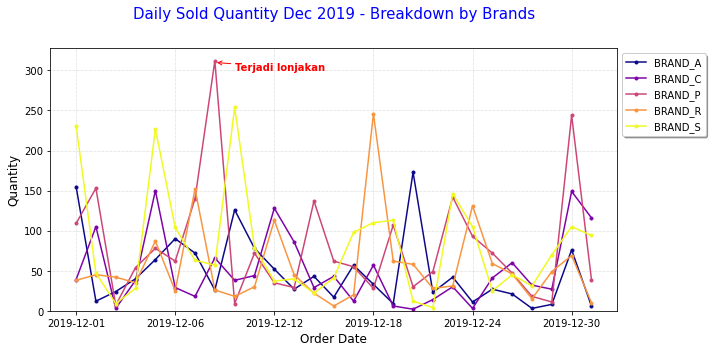

In [5]:
dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Daily Sold Quantity Dec 2019 - Breakdown by Brands',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Order Date', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='best', bbox_to_anchor=(1, 1), shadow=True, ncol=1)
plt.annotate('Terjadi lonjakan', xy=(7, 310), xytext=(8, 300),
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='red'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

In [11]:
dataset_top5brand_dec_per_product = dataset_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()
dataset_top5brand_dec_per_product

,brand,product_id,quantity
0,BRAND_A,P0002,1
1,BRAND_A,P0003,32
2,BRAND_A,P0029,12
3,BRAND_A,P0030,30
4,BRAND_A,P0033,1
...,...,...,...
490,BRAND_S,P3653,2
491,BRAND_S,P3655,12
492,BRAND_S,P3659,3
493,BRAND_S,P3665,6


In [14]:
dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if (x >=100) else '< 100')
dataset_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)

In [15]:
dataset_top5brand_dec_per_product

,brand,product_id,quantity,quantity_group
58,BRAND_A,P0255,258,>= 100
465,BRAND_S,P3534,234,>= 100
238,BRAND_P,P2770,216,>= 100
245,BRAND_P,P2790,185,>= 100
186,BRAND_P,P2489,170,>= 100
...,...,...,...,...
147,BRAND_C,P0927,1,< 100
149,BRAND_C,P0937,1,< 100
161,BRAND_P,P2417,1,< 100
163,BRAND_P,P2421,1,< 100


In [13]:
s_sort = dataset_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)
s_sort

brand
BRAND_S    152
BRAND_P    103
BRAND_R     87
BRAND_C     85
BRAND_A     68
Name: product_id, dtype: int64

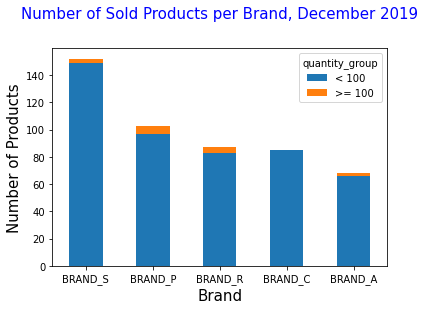

In [17]:
dataset_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

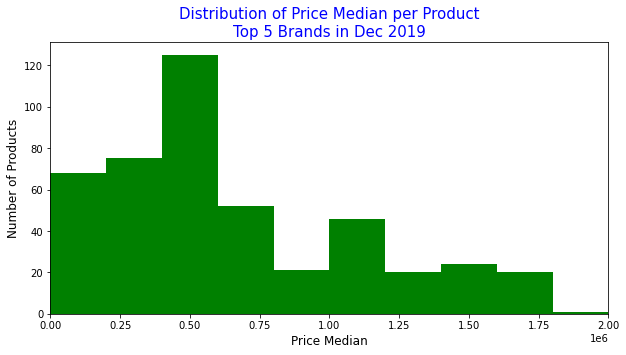

In [20]:
plt.figure(figsize=(10,5))
plt.hist(dataset_top5brand_dec.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1,2000000), color='green')
plt.title('Distribution of Price Median per Product\nTop 5 Brands in Dec 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Number of Products',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.show()

In [25]:
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'sum'}).reset_index()
data_per_product_top5brand_dec

,product_id,quantity,gmv,item_price
0,P0002,1,904000,904000
1,P0003,32,14400000,900000
2,P0011,2,11890000,11890000
3,P0029,12,3720000,310000
4,P0030,30,7200000,480000
...,...,...,...,...
490,P3653,2,298000,149000
491,P3655,12,1908000,159000
492,P3659,3,4395000,4395000
493,P3665,6,14250000,2375000


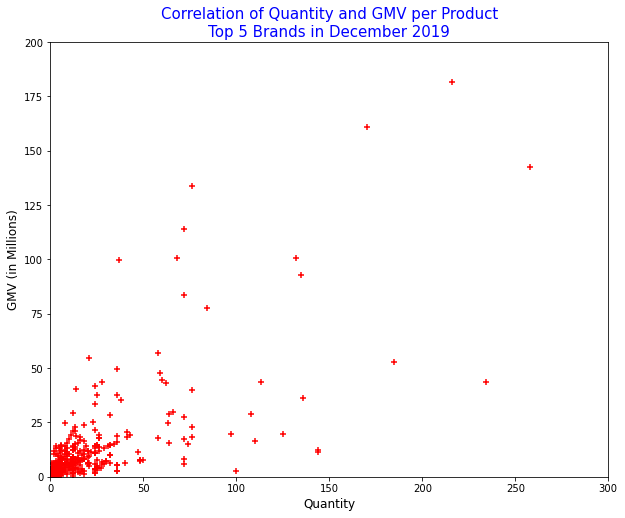

In [29]:
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['quantity'],data_per_product_top5brand_dec['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

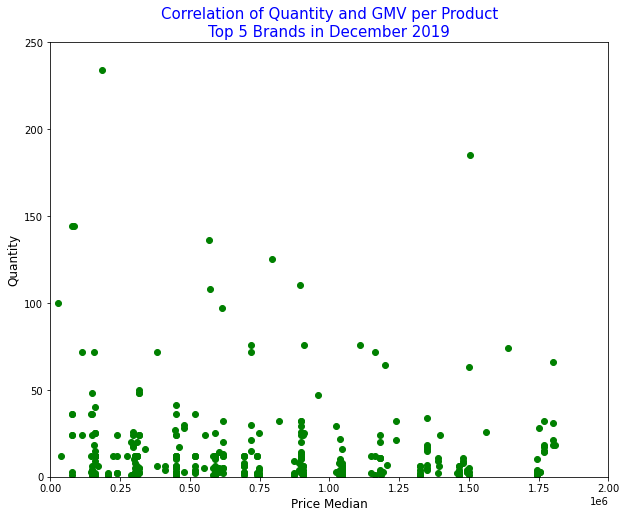

In [30]:
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['item_price'],data_per_product_top5brand_dec['quantity'], marker='o', color='green')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)
plt.show()